# **Projeto 5**
## Parte B

## Implementar três autômatos geradores de sinais 1D, incluindo o autômato do CDT-23 (Figura2). Os outros dois autômatos devem ser projetados para gerar sinas de onda retangular e triangular.

In [35]:
automata_A = np.array([
    [0.5, 0, 0, 0.7],
    [0.5, 0.1, 0, 0],
    [0, 0.9, 0.6, 0],
    [0, 0, 0.4, 0.3]
])

In [36]:
automata_R = np.array([
    [1/4, 1/2, 1/2, 1/2],
    [1/4, 1/2, 0, 0.],
    [1/4, 0, 1/2, 0],
    [1/4, 0, 0, 1/2]
], dtype=float)

In [37]:
automata_T = np.array([
    [0.5, 0  , 0  , 0  , 0  , 0.9],
    [0.5, 0.1, 0  , 0  , 0  , 0  ],
    [0  , 0.9, 0.6, 0  , 0  , 0  ],
    [0  , 0  , 0.4, 0.3, 0  , 0  ],
    [0  , 0  , 0  , 0.7, 0.6, 0  ],
    [0  , 0  , 0  , 0  , 0.4, 0.1],
])

mask_T = np.array([0, 1, 2, 3, 2, 1])

In [38]:
signal_length = 200
init = 0

signal_A = probabilistic_automata(automata_A, init, signal_length, seed = 42)
signal_R = probabilistic_automata(automata_R, init, signal_length, seed = 42)
signal_T = probabilistic_automata(automata_T, init, signal_length, mask = mask_T, seed = 42)
signal_TS = mirror_wave(probabilistic_automata(automata_A, init, signal_length, seed = 42))

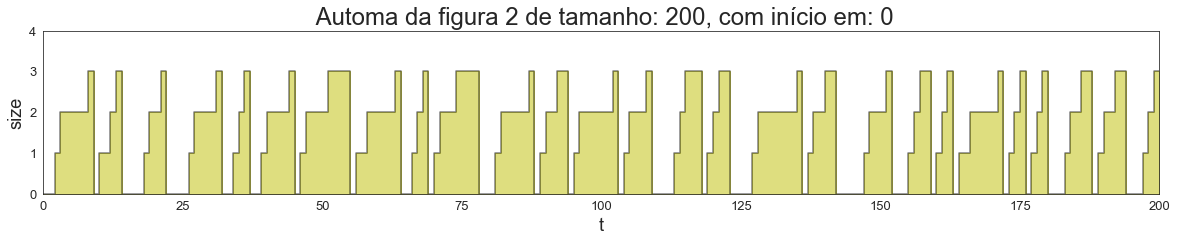

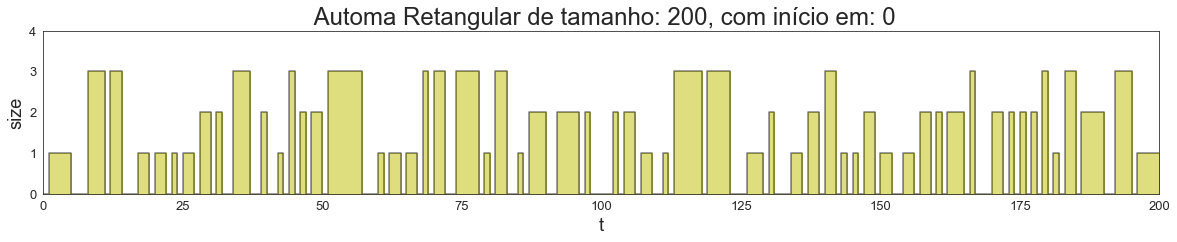

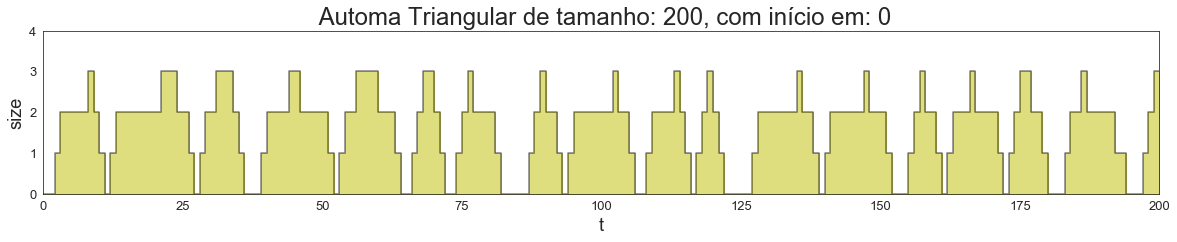

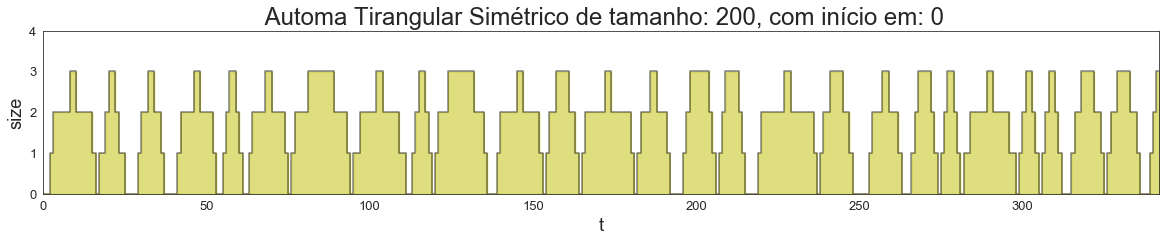

In [39]:
plot_square_signal(signal_A,
                   title = f' Automa da figura 2 de tamanho: {signal_length}, com início em: {init}',
                   size = (20,3),
                   celling = 1,
                   alphas = (0.5, 0.5))
plt.savefig(f"ata.png", dpi=150)
plot_square_signal(signal_R,
                   title = f' Automa Retangular de tamanho: {signal_length}, com início em: {init}',
                   size = (20,3),
                   celling = 1,
                   alphas = (0.5, 0.5))
plt.savefig(f"atr_ac.png", dpi=150)
plot_square_signal(signal_T,
                   title = f' Automa Triangular de tamanho: {signal_length}, com início em: {init}',
                   size = (20,3),
                   celling = 1,
                   alphas = (0.5, 0.5))
plt.savefig(f"att_ac.png", dpi=150)
plot_square_signal(signal_TS,
                   title = f' Automa Tirangular Simétrico de tamanho: {signal_length}, com início em: {init}',
                   size = (20,3),
                   celling = 1,
                   alphas = (0.5, 0.5))

plt.savefig(f"atts", dpi=150)

## Utilizando estes autômatos, gerar 50 realizações de cada um dos 3 tipos de sinais, totalizando 150 objetos.

In [40]:
numero_amostras = 50

inicio = 0
comprimento_sinal = 200

amostras_A = sample_automata(numero_amostras, automata_A, inicio, comprimento_sinal)
amostras_R = sample_automata(numero_amostras, automata_R, inicio, comprimento_sinal)
amostras_T = sample_automata(numero_amostras, automata_T, inicio, comprimento_sinal, mask_T)
amostras_TS = sample_automata(numero_amostras, automata_A, inicio, comprimento_sinal, mirror = True)

## Extrair ao menos 9 medidas (das constantes no CDT-23) e visualizar em scatterplots as respectivas combinações dois-a-dois. 

### Aplicando uma tranformação que separa os sinais

In [41]:
split_A = [split_discret_signal(i) for i in amostras_A]
split_R = [split_discret_signal(i) for i in amostras_R]
split_T = [split_discret_signal(i) for i in amostras_T]
split_TS = [split_discret_signal(i) for i in amostras_TS]

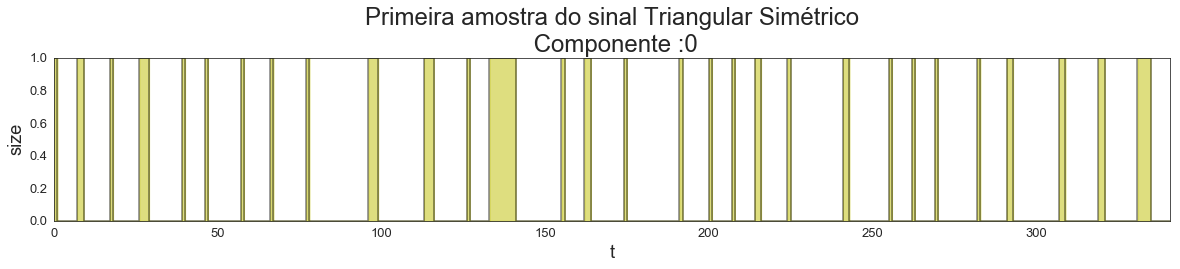

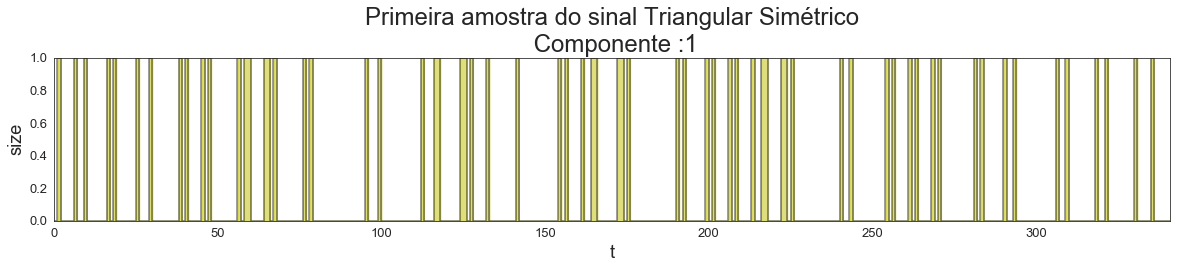

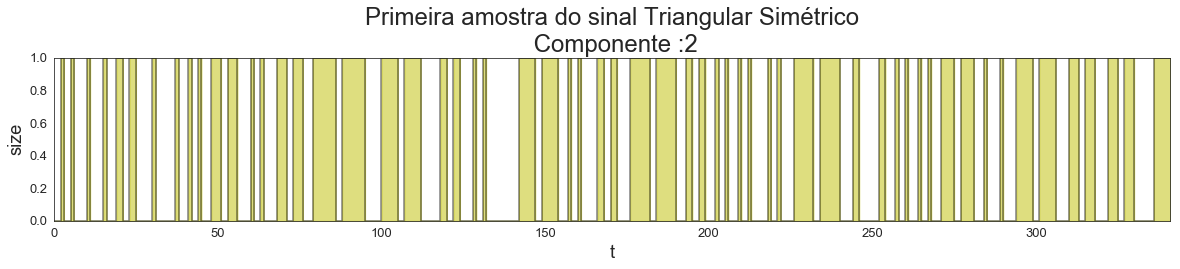

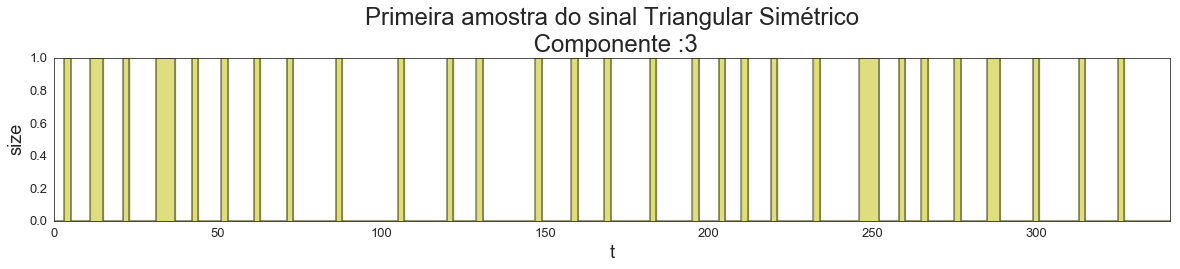

In [42]:
for i in np.arange(4):
    plot_square_signal(split_TS[0][i],
                       title = f'Primeira amostra do sinal Triangular Simétrico\n Componente :{i}',
                       size = (20,3),
                       celling = 0,
                       alphas = (0.5, 0.5))
    
    plt.savefig(f"atts{i}", dpi=150)

### DataFrame das medidas

In [43]:
medidas = pd.DataFrame()

### Médias e Variâncias dos sinais 

In [44]:
medias_A = [ i.mean() for i in amostras_A]
medias_R = [ i.mean() for i in amostras_R]
medias_T = [ i.mean() for i in amostras_T]
medias_TS = [ i.mean() for i in amostras_TS]

In [45]:
variancias_A = [ i.var(ddof = 1) for i in amostras_A]
variancias_R = [ i.var(ddof = 1) for i in amostras_R]
variancias_T = [ i.var(ddof = 1) for i in amostras_T]
variancias_TS = [ i.var(ddof = 1) for i in amostras_TS]

In [46]:
medidas['Label'] = ['Fig2']*50 + ['Retangular']*50 + ['Triangular']*50 + ['Triangular Simetrica']*50

medidas['Media'] = medias_A + medias_R + medias_T + medias_TS
medidas['Variancia'] = variancias_A + variancias_R + variancias_T + variancias_TS

### Médias e Variâncias das frequências relativas

In [47]:
media_lA = np.array([[j.mean() for j in i] for i in split_A ])
media_lR = np.array([[j.mean() for j in i] for i in split_R ])
media_lT = np.array([[j.mean() for j in i] for i in split_T ])
media_lTS = np.array([[j.mean() for j in i] for i in split_TS ])

In [48]:
var_lA = np.array([[j.var(ddof = 1) for j in i] for i in split_A ])
var_lR = np.array([[j.var(ddof = 1) for j in i] for i in split_R ])
var_lT = np.array([[j.var(ddof = 1) for j in i] for i in split_T ])
var_lTS = np.array([[j.var(ddof = 1) for j in i] for i in split_TS ])

In [49]:
for i in np.arange(4):
    
    medidas[f'Media_l{i}'] = np.concatenate((media_lA[:, i], media_lR[:, i], media_lT[:, i], media_lTS[:, i]))
    medidas[f'Variancia_l{i}'] = np.concatenate((var_lA[:, i], var_lR[:, i], var_lT[:, i], var_lTS[:, i]))

### Calculando os Bursts

In [50]:
burst_lA = np.array([[scan_burst(j) for j in i] for i in split_A ])
burst_lR = np.array([[scan_burst(j) for j in i] for i in split_R ])
burst_lT = np.array([[scan_burst(j) for j in i] for i in split_T ])
burst_lTS = np.array([[scan_burst(j) for j in i] for i in split_TS ])

### Calculando as médias e variâncias do scan burst

In [51]:
media_SA = np.array([[j.mean() for j in i] for i in burst_lA ])
media_SR = np.array([[j.mean() for j in i] for i in burst_lR ])
media_ST = np.array([[j.mean() for j in i] for i in burst_lT ])
media_STS = np.array([[j.mean() for j in i] for i in burst_lTS ])

In [52]:
var_SA = np.array([[j.var(ddof = 1) for j in i] for i in burst_lA ])
var_SR = np.array([[j.var(ddof = 1) for j in i] for i in burst_lR ])
var_ST = np.array([[j.var(ddof = 1) for j in i] for i in burst_lT ])
var_STS = np.array([[j.var(ddof = 1) for j in i] for i in burst_lTS ])

In [53]:
for i in np.arange(4):
    
    medidas[f'Media_B{i}'] = np.concatenate((media_SA[:, i], media_SR[:, i], media_ST[:, i], media_STS[:, i]))
    medidas[f'Variancia_B{i}'] = np.concatenate((var_SA[:, i], var_SR[:, i], var_ST[:, i], var_STS[:, i]))

### Calculando o InterSymbols 

In [54]:
inter_lA = np.array([[scan_intersymbols(j) for j in i] for i in split_A ])
inter_lR = np.array([[scan_intersymbols(j) for j in i] for i in split_R ])
inter_lT = np.array([[scan_intersymbols(j) for j in i] for i in split_T ])
inter_lTS = np.array([[scan_intersymbols(j) for j in i] for i in split_TS ])

### Calculando as médias e variâncias do InterSymbols 

In [55]:
media_DA = np.array([[j.mean() for j in i] for i in inter_lA ])
media_DR = np.array([[j.mean() for j in i] for i in inter_lR ])
media_DT = np.array([[j.mean() for j in i] for i in inter_lT ])
media_DTS = np.array([[j.mean() for j in i] for i in inter_lTS ])

In [56]:
var_DA = np.array([[j.var(ddof = 1) for j in i] for i in inter_lA ])
var_DR = np.array([[j.var(ddof = 1) for j in i] for i in inter_lR ])
var_DT = np.array([[j.var(ddof = 1) for j in i] for i in inter_lT ])
var_DTS = np.array([[j.var(ddof = 1) for j in i] for i in inter_lTS ])

In [57]:
for i in np.arange(4):
    
    medidas[f'Media_D{i}'] = np.concatenate((media_DA[:, i], media_DR[:, i], media_DT[:, i], media_DTS[:, i]))
    medidas[f'Variancia_D{i}'] = np.concatenate((var_DA[:, i], var_DR[:, i], var_DT[:, i], var_DTS[:, i]))

### Calculando a entropia do sinal

In [58]:
medidas['Entropia'] = [entropy(p) for p in medidas.iloc[:, 3:7].to_numpy()]

### Selecionando as medidas e visualizando seus scatter plots 

In [59]:
medidas.describe().T

,count,mean,std,min,25%,50%,75%,max
Media,200.0,1.476700,0.205380,1.010000,1.362500,1.515000,1.642593,1.803977
Variancia,200.0,1.111742,0.190838,0.738090,0.948342,1.115013,1.268065,1.607010
Media_l0,200.0,0.261281,0.098222,0.122159,0.175000,0.245000,0.348750,0.470000
Variancia_l0,200.0,0.184264,0.042859,0.107542,0.145101,0.185905,0.228222,0.250352
Media_l1,200.0,0.189063,0.031703,0.095000,0.167378,0.187022,0.211250,0.275000
Variancia_l1,200.0,0.153005,0.019729,0.086407,0.139811,0.152505,0.167456,0.200377
Media_l2,200.0,0.361330,0.105276,0.120000,0.288750,0.386287,0.442600,0.545000
Variancia_l2,200.0,0.220722,0.036997,0.106131,0.206401,0.238015,0.247501,0.251256
Media_l3,200.0,0.188326,0.043825,0.095000,0.153750,0.195000,0.221749,0.290000
Variancia_l3,200.0,0.151614,0.027575,0.086407,0.130760,0.157764,0.173071,0.206935


In [86]:
medidas.shape

(200, 28)

In [60]:
colunas = ['Media', 'Variancia', 'Entropia', 'Media_D0', 'Media_D1', 'Media_D2', 'Media_D3', 'Media_l0', 'Media_l1', 'Media_l2', 'Media_l3']

In [61]:
nc = len(colunas)

filtros = filters(medidas['Label'])

labels = ['Fig2', 'Retangular', 'Triangular', 'Triangular S']

In [62]:
imgs = [(0,3), (3,6), (6, 9)]

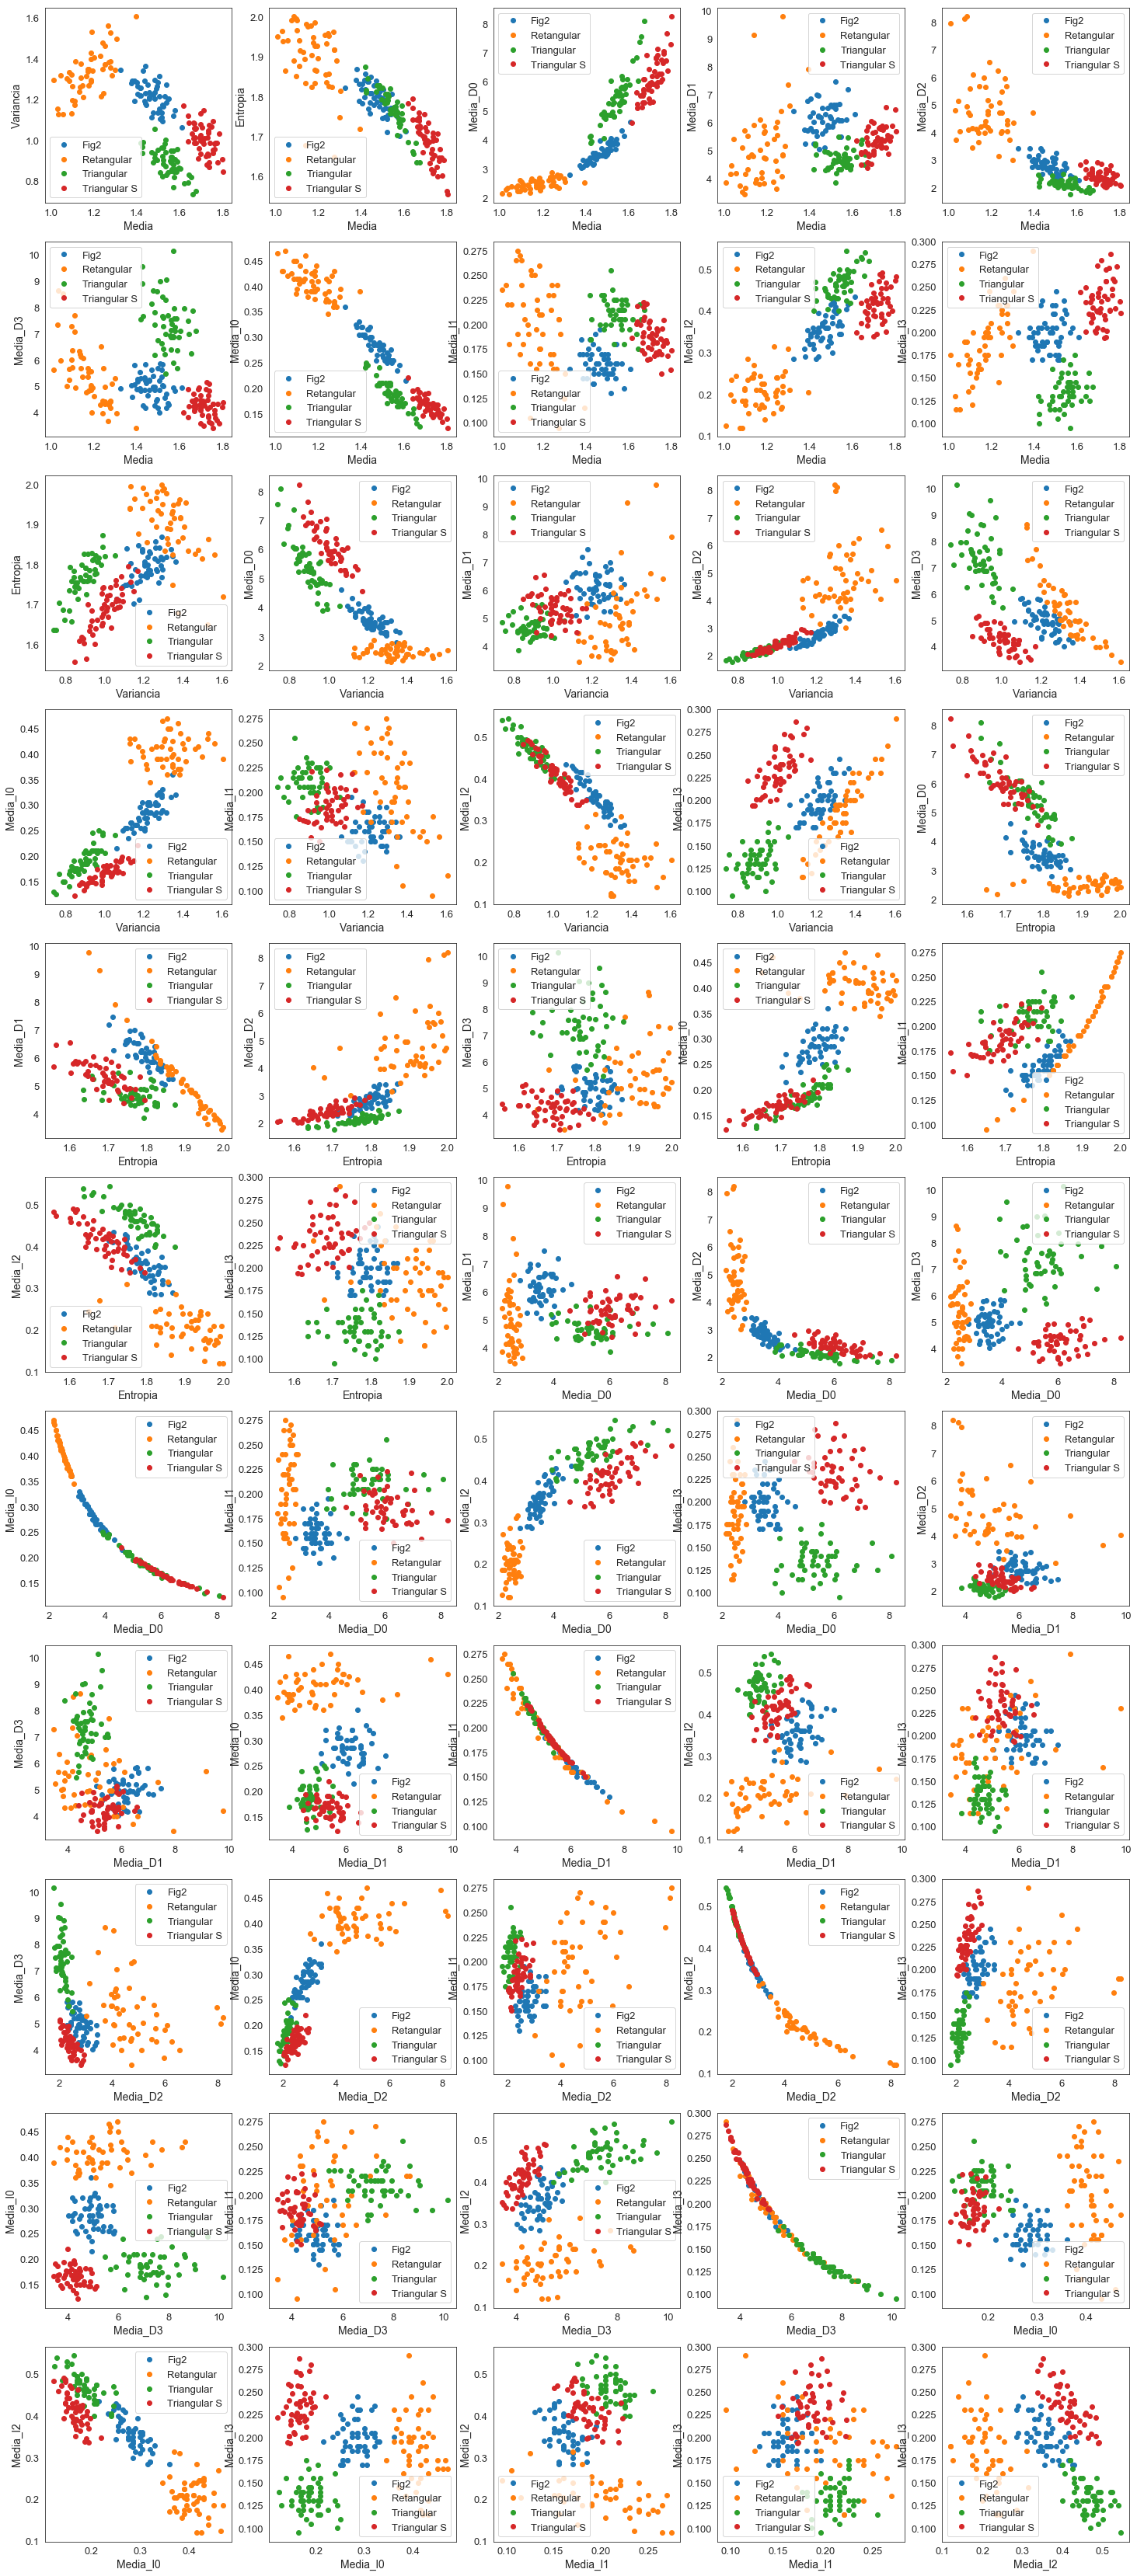

In [63]:
fig, axis = plt.subplots(11, 5, figsize = (25, 60))

axis = axis.flatten()

img = 0

for i in np.arange(nc):
    for j in np.arange(i+1, nc):
        
        plt.sca(axis[img])
        
        plt.xlabel(colunas[i])
        plt.ylabel(colunas[j])
        k = 0
        for f in filtros:
            plt.plot(medidas[colunas[i]][f], medidas[colunas[j]][f], 'o', label = labels[k])
            k+=1
        plt.legend()
    
        img += 1
    
plt.savefig("test.png", dpi=150)

In [64]:
cov = medidas.iloc[:,1:].cov().to_numpy()

In [65]:
eig_values, eig_vectors = al.eig(cov)

In [66]:
pc_explanations = eig_values/eig_values.sum()

In [67]:
pc_explanations[0:2]*100

array([51.79967356, 29.01642197])

In [68]:
pca_transformation_matrix = eig_vectors[:, 0:2]

In [69]:
pca_transformation_matrix

array([[ 3.84371322e-03,  8.82031412e-04],
       [-2.56769192e-03,  1.66919056e-03],
       [-1.84353903e-03,  7.76452168e-05],
       [-7.07259151e-04,  2.83402302e-05],
       [-8.83695211e-05, -5.16512131e-04],
       [-3.93870852e-05, -3.33515391e-04],
       [ 1.86364292e-03, -8.19428000e-05],
       [ 7.01124180e-04, -5.19884260e-06],
       [ 6.82656338e-05,  5.20809714e-04],
       [ 3.83712467e-05,  3.29451872e-04],
       [ 5.89353329e-03, -1.89884287e-04],
       [ 1.26574501e-02, -1.99753214e-04],
       [-9.12022730e-03, -2.88635455e-04],
       [-1.97581746e-02, -2.42096158e-03],
       [ 4.72501779e-03, -1.19162178e-04],
       [ 1.73305748e-02, -1.04549601e-03],
       [-2.03977589e-03,  4.22016117e-04],
       [-7.89891858e-03, -1.86814482e-03],
       [ 2.31227716e-02, -7.56704738e-04],
       [ 1.69216066e-01, -2.79638144e-03],
       [ 7.91101397e-04,  1.77319927e-02],
       [-6.09505510e-01,  7.43827652e-01],
       [-2.16031482e-02,  2.55988305e-04],
       [-3.

In [70]:
pca = medidas.iloc[:,1:].dot(pca_transformation_matrix).to_numpy()

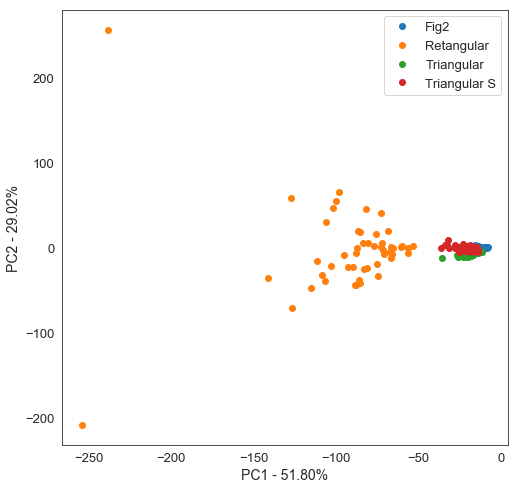

In [71]:
k = 0
for f in filtros:
    plt.plot(pca[:,0][f], pca[:,1][f], 'o', label = labels[k])
    k+=1
    
plt.xlabel(f'PC1 - {pc_explanations[0]*100:.2f}%')
plt.ylabel(f'PC2 - {pc_explanations[1]*100:.2f}%')

plt.legend()
plt.savefig("automata-pca.png", dpi=150)

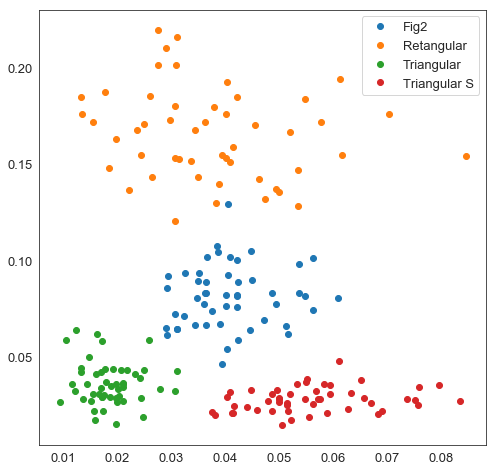

In [72]:
k = 0
for f in filtros:
    plt.plot(medidas['Media_l3'][f]/medidas['Media_D3'][f], medidas['Media_l0'][f]/medidas['Media_D0'][f], 'o', label = labels[k])
    k+=1
plt.legend()
plt.savefig("automata-melhor-separacao.png", dpi=150)


In [73]:
label_enconder = preprocessing.LabelEncoder()

label_enconder.fit(medidas['Label'])
## label_enconder.inverse_transform([0]) decoder

LabelEncoder()

In [74]:
medidas['Label'] = label_enconder.transform(medidas['Label'])

In [75]:
train, test, labels_train, labels_test = train_test_split(pca, medidas['Label'], 25)

In [76]:
knn_fit = knn(train, labels_train, 1)

In [77]:
labels_forecasted = knn_fit(test)

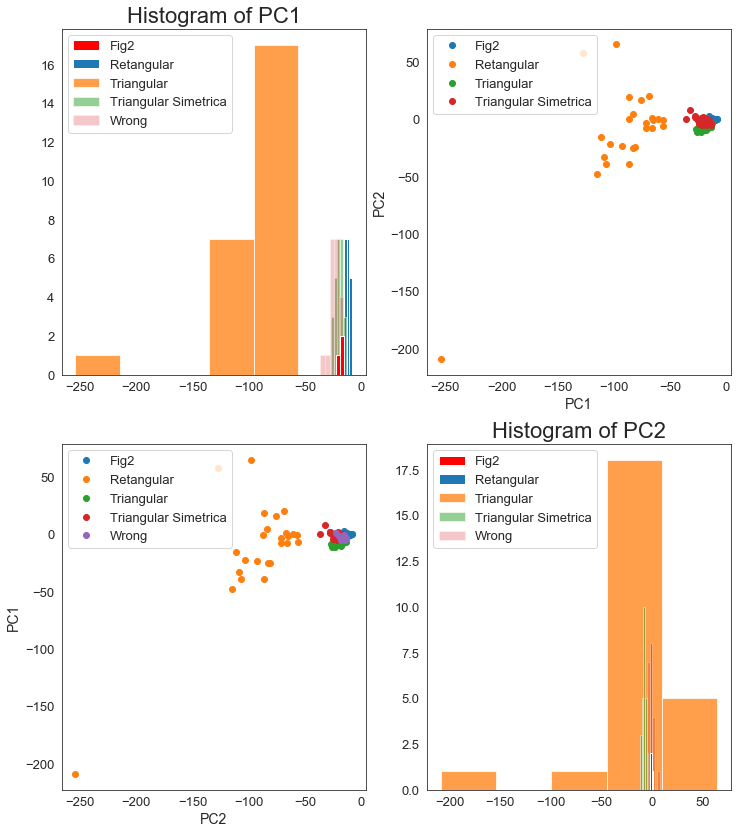

In [80]:
train_test_plot(test, labels_test, labels_forecasted, label_enconder.inverse_transform([0,1,2,3]),['PC1', 'PC2'])
plt.savefig(f"automata-pca-result", dpi=150)

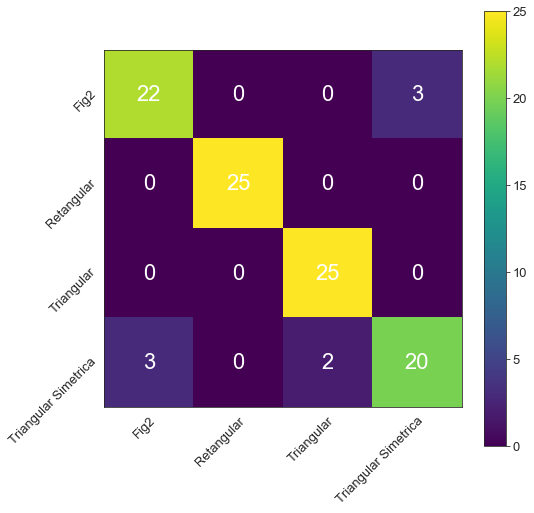

In [81]:
plot_confusion(labels_test, labels_forecasted)
plt.savefig(f"automata-pca-confusion", dpi=150)

In [82]:
train, test, labels_train, labels_test = train_test_split(medidas.iloc[:,2:].to_numpy(), medidas['Label'], 25)

In [83]:
knn_fit = knn(train, labels_train, 1)

In [84]:
labels_forecasted = knn_fit(test)

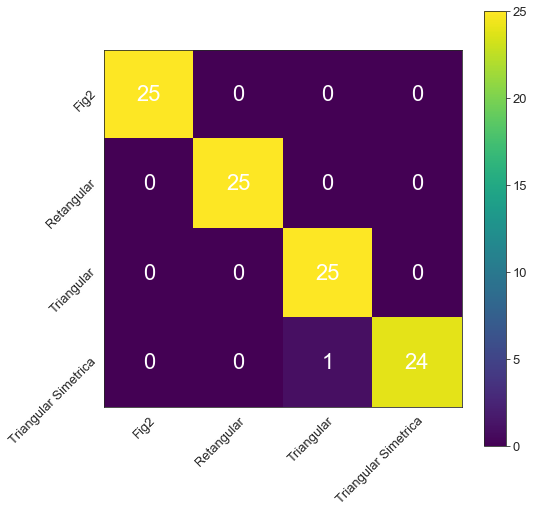

In [85]:
plot_confusion(labels_test, labels_forecasted)
plt.savefig(f"automata-confusion", dpi=150)

## **Funções Auxiliares**

In [12]:
def confusion_matrix(test, forecast):
    
    values = sorted(np.unique(np.concatenate((test, forecast))))
    
    n = len(values)
    
    matrix = np.zeros((n, n), dtype = int)
    
    errors = test != forecast 
    
    filters = []
    
    for v in values:
        
        filters.append(test == v)
    
    for i in np.arange(n):
        
        rights = errors == False
        
        matrix[i][i] = sum(rights & filters[i])
        
    for i in range(n):
        
        wrong_values = forecast[errors & filters[i]]
            
        unique, counts = np.unique(wrong_values, return_counts=True)
        
        for k in np.arange(len(unique)):
            matrix[i, unique[k]] = counts[k] 
        
    return matrix

In [13]:
def plot_confusion(test, forecast):
    
    values = sorted(np.unique(np.concatenate((test, forecast))))
    
    n = len(values)
    
    matrix = confusion_matrix(test, forecast)
    
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar()
    
    plt.xticks(np.arange(n), label_enconder.inverse_transform([0,1,2,3]), rotation=45, ha="right", rotation_mode="anchor")
    plt.yticks(np.arange(n), label_enconder.inverse_transform([0,1,2,3]), rotation=45, ha="right", rotation_mode="anchor")  
    
    for i in range(n):
        for j in range(n):
            plt.text(j, i, matrix[i, j], ha="center", va="center", color="w", fontsize = 22)

In [14]:
def filters(labels):
    
    values = labels.unique()
    
    n = len(values)
    
    f = []
    
    for v in values:
        
        f.append(labels == v)
    
    return f, values

In [79]:
def train_test_plot(test, labels_test,labels_forecasted, legend, column_names):
    
    df_test = np.copy(test)
    
    l_test = np.copy(labels_test)
    l_fore = np.copy(labels_forecasted)
    
    _, n = df_test.shape
    
    filters_test= []
    filters_fore = []
    
    label_values = np.unique(l_test)
    
    for label in label_values:

        filters_test.append(l_test == label)
        filters_fore.append(l_fore == label)
    
    errors = labels_test != labels_forecasted
    rights = errors == False
    
    fig, axes = plt.subplots(n, n, figsize = (n*6, n*7))
    
    for i in range(n):
        for j in range(i+1,n):
            
            plt.sca(axes[i, j])
            
            plt.xlabel(column_names[i])
            plt.ylabel(column_names[j])
            
            for f in filters_test:
    
                plt.plot(df_test[f][:, i], df_test[f][:, j], 'o', label = l_test[f][0])
            
            plt.legend(loc='upper left', labels = legend)
            
            plt.sca(axes[j, i])
            
            plt.xlabel(column_names[j])
            plt.ylabel(column_names[i])
            
            for f in filters_fore:
    
                plt.plot(df_test[f][:, i], df_test[f][:, j], 'o', label = l_fore[f][0])
            
            plt.plot(df_test[errors][:, i], df_test[errors][:, j], 'o', label = n)
                    
            plt.legend(loc='upper left', labels = np.append(label_enconder.inverse_transform([0,1,2,3]), 'Wrong'))
    
    for i in range(n):
        
        alpha = 1
        
        for f in filters_fore:
            
            plt.sca(axes[i][i])
            
            plt.title(f'Histogram of {column_names[i]}', fontsize = 22)     
            plt.hist(df_test[f & rights][:, i], alpha = alpha, bins= 'sqrt')
            
            alpha -= 0.25
        
        plt.hist(df_test[f & errors][:, i], color='red', bins= 'sqrt', label = 'wrong')
        plt.legend(loc='upper left', labels = np.append(label_enconder.inverse_transform([0,1,2,3]), 'Wrong'))
        


In [16]:
def knn(data, labels, k = 1):
    
    m = data.shape[0]
    
    def fit(test):
        
        n = test.shape[0]
        
        forecast = np.zeros(n, dtype = int)
        
        for i in np.arange(n):
            
            distances = {}
            
            coordinates_test = test[i]
            
            for j in np.arange(m):
                
                coordinates_train = data[j]
                
                distances[j] = np.sqrt(sum((coordinates_test - coordinates_train)**2))
            
            nn = np.array(sorted(distances.items(),key=operator.itemgetter(1)), dtype = int)[:k, 0]
            nn_labels = labels[nn]
            
            nn_unique_labels = np.unique(nn_labels)
            
            count = np.zeros_like(nn_unique_labels)
            
            for l in np.arange(len(nn_unique_labels)):
                count[l] += 1
            
            forecast[i] = nn_unique_labels[count.argmax()]
        return forecast
    return fit           

In [17]:
def train_test_split(data, labels, amount):
    
    label_values = labels.unique()
    
    n = data.shape[0] 
    m = len(label_values)
    
    filters = []
    
    train = []
    test = []
    
    count = [0]*n
    
    for value in label_values:
        
        filters.append(labels == value)
    
    for i in np.arange(n):
        
        aux = True
        
        for j in np.arange(m):
            
            if filters[j][i] and count[j] < amount:
                
                train.append(i)
                
                count[j] += 1
                aux = False
                
                break
                
        if aux:
            test.append(i)
            
    data_ = data
    labels_ = labels.to_numpy()
            
    return data_[train], data_[test], labels_[train], labels_[test]

In [18]:
def filters(labels):
    
    values = labels.unique()
    
    n = len(values)
    
    f = []
    
    for v in values:
        
        f.append(labels == v)
    
    return f, values

In [19]:
def train_test_plot(test, labels_test,labels_forecasted, legend):
    
    df_test = np.copy(test)
    
    l_test = np.copy(labels_test)
    l_fore = np.copy(labels_forecasted)
    
    _, n = df_test.shape
    
    filters_test= []
    filters_fore = []
    
    label_values = np.unique(l_test)
    
    for label in label_values:

        filters_test.append(l_test == label)
        filters_fore.append(l_fore == label)
    
    errors = labels_test != labels_forecasted
    rights = errors == False
    
    fig, axes = plt.subplots(n, n, figsize = (n*6, n*7))
    
    for i in range(n):
        for j in range(i+1,n):
            
            plt.sca(axes[i, j])
            
            plt.xlabel(column_names[i])
            plt.ylabel(column_names[j])
            
            for f in filters_test:
    
                plt.plot(df_test[f][:, i], df_test[f][:, j], 'o', label = l_test[f][0])
            
            plt.legend(loc='upper left', labels = legend)
            
            plt.sca(axes[j, i])
            
            plt.xlabel(column_names[j])
            plt.ylabel(column_names[i])
            
            for f in filters_fore:
    
                plt.plot(df_test[f][:, i], df_test[f][:, j], 'o', label = l_fore[f][0])
            
            plt.plot(df_test[errors][:, i], df_test[errors][:, j], 'o', label = n)
                    
            plt.legend(loc='upper left', labels = np.append(label_enconder.inverse_transform([0,1,2]), 'Wrong'))
    
    for i in range(n):
        
        alpha = 1
        
        for f in filters_fore:
            
            plt.sca(axes[i][i])
            
            plt.title(f'Histogram of {column_names[i]}', fontsize = 22)     
            plt.hist(df_test[f & rights][:, i], alpha = alpha, bins= 'sqrt')
            
            alpha -= 0.25
        
        plt.hist(df_test[f & errors][:, i], color='red', bins= 'sqrt', label = 'wrong')
        plt.legend(loc='upper left', labels = np.append(label_enconder.inverse_transform([0,1,2]), 'Wrong'))
        


In [20]:
def knn(data, labels, k = 1):
    
    m = data.shape[0]
    
    def fit(test):
        
        n = test.shape[0]
        
        forecast = np.zeros(n, dtype = int)
        
        for i in np.arange(n):
            
            distances = {}
            
            coordinates_test = test[i]
            
            for j in np.arange(m):
                
                coordinates_train = data[j]
                
                distances[j] = np.sqrt(sum((coordinates_test - coordinates_train)**2))
            
            nn = np.array(sorted(distances.items(),key=operator.itemgetter(1)), dtype = int)[:k, 0]
            nn_labels = labels[nn]
            
            nn_unique_labels = np.unique(nn_labels)
            
            count = np.zeros_like(nn_unique_labels)
            
            for l in np.arange(len(nn_unique_labels)):
                count[l] += 1
            
            forecast[i] = nn_unique_labels[count.argmax()]
        return forecast
    return fit           

In [21]:
def train_test_split(data, labels, amount):
    
    label_values = labels.unique()
    
    n = data.shape[0] 
    m = len(label_values)
    
    filters = []
    
    train = []
    test = []
    
    count = [0]*n
    
    for value in label_values:
        
        filters.append(labels == value)
    
    for i in np.arange(n):
        
        aux = True
        
        for j in np.arange(m):
            
            if filters[j][i] and count[j] < amount:
                
                train.append(i)
                
                count[j] += 1
                aux = False
                
                break
                
        if aux:
            test.append(i)
            
    data_ = data
    labels_ = labels.to_numpy()
            
    return data_[train], data_[test], labels_[train], labels_[test]

In [22]:
def filters(labels):
    
    f = []
    
    for v in labels.unique():
        f.append(labels == v)
    
    return f

In [23]:
def entropy_r(rs, base = 2 ):
    
    e = 0
    
    for r in rs:
        
        if r != 0:
            e -= r*np.log2(r)
    
    e /= np.log2(base)
    
    return e

In [24]:
def entropy(ps, base = 2 ):
    
    e = 0
    
    for p in ps:
        
         e -= p*np.log2(p)
    
    e /= np.log2(base)
    
    return e

In [25]:
def sample_automata(n, matrix, init, length, mask = [], mirror = False):
    
    sample = []
    
    for i in np.arange(n):
        
        if not mirror:
            sample.append(probabilistic_automata(matrix, init, length, mask = mask, seed = i))
        else:
            sample.append(mirror_wave(probabilistic_automata(matrix, init, length, mask = mask, seed = i)))
        
    return np.array(sample)

In [26]:
def mirror_wave(signal):
    
    n = signal.shape[0]
    
    new_signal = np.copy(signal)
    
    imin = 0
    
    vmin = signal.min()

    index_correction = 0
    
    for i in np.arange(1,n):
        
        if signal[i] == vmin:
            
            aux = np.flip(signal[imin+1: i])
            new_signal = np.insert(new_signal, i+index_correction, aux)
            
            index_correction += len(aux)

            imin = i
    
    return new_signal

In [27]:
def monte_carlo(v):
    
    r = np.random.uniform()
    
    n = len(v)
    
    Fv = 0

    for i in range(n):
        
        Fv += v[i]
        
        if Fv > r:
            
            return i
    
    return n-1

In [28]:
def probabilistic_automata(matrix, init, length, mask=[], seed = 42):
    
    np.random.seed(seed)
    
    n, _ = matrix.shape
    
    if len(mask) != n:
        mask = np.arange(n)
    
    signal = np.zeros(length, dtype = int)
    signal[0] = init
    
    last = init
    
    for i in range(1, length):
        
        last = monte_carlo(matrix[:, last])
        
        signal[i] = mask[last]
    
    return np.array(signal)

In [29]:
def split_discret_signal(signal):
    
    s0, sn = signal.min(), signal.max()
    s = np.arange(s0, sn + 1, 1)
    
    
    n = sn - s0 + 1
    length = len(signal)
    
    signals = np.array([np.zeros(length)]*n, dtype = int)
    
    for j in np.arange(length):
        for i in np.arange(n):
            
            if s[i] == signal[j]:
                
                signals[i][j] = 1
                
                pass
    
    return signals

In [30]:
def integrate_automata(signal):
    
    length = len(signal)
    
    I = np.zeros(length)
    
    aux = 0
    
    for i in np.arange(length):
        
        aux += signal[i]
        
        I[i] = aux
    
    return I

In [31]:
def scan_burst(signal):
    
    burst_sizes = []
    
    aux = 0
    
    for s in signal:
        
        if s == 1:
            
            aux += 1
        
        elif aux >= 1:
            
            burst_sizes.append(aux)
            
            aux = 0
            
    return np.array(burst_sizes)

In [32]:
def scan_intersymbols(signal):
    
    n= len(signal)
    
    Ds = []
    i0 = 0
    
    for i in np.arange(1, n):
        
        if signal[i] == 1:
            
            d = i - i0
            
            if d > 0:
                
                Ds.append(d)
            i0 = i
    
    return np.array(Ds)

In [33]:
def signal_to_square_1D(signal):
    
    n = len(signal)
    
    x = []
    y = []
    
    for i in range(n):
        
        x.append(i)
        y.append(signal[i])
        
        x.append(i + 1)
        y.append(signal[i])
        
    return x, y  


In [34]:
def plot_square_signal(signal, 
                       background = 'w', 
                       line_color = 'black', 
                       fill_color = 'y', 
                       size = (15, 5), 
                       alphas = (1, 1), 
                       title = 'Signal', 
                       xlabel = 't', 
                       ylabel = 'size', 
                       celling = 1):
    
    x, y = signal_to_square_1D(signal)
    
    fig = plt.figure(figsize = size)
    
    plt.plot(x, y, c = line_color, alpha = alphas[0])
    plt.fill_between(x, 0, y, color=fill_color, alpha = alphas[1])
    
    plt.xlim((0, max(x)))
    plt.ylim((0, max(y)+celling))
    
    plt.title(title, fontsize = 24)
    
    plt.xlabel(xlabel, fontsize = 18)
    plt.ylabel(ylabel, fontsize = 18)
    
    ax = plt.gca()
    ax.set_facecolor(background)
    

## **Blibliotecas**

In [1]:
import numpy as np
from numpy import linalg as al

In [2]:
import pandas as pd

In [3]:
from sklearn import preprocessing

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
import seaborn as sns

In [6]:
import operator

In [7]:
from scipy.stats import gaussian_kde

In [8]:
%matplotlib inline

In [9]:
sns.set_style('white') # darkgrid, white grid, dark, white and ticks

In [10]:
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
plt.rc('figure', figsize = (8,8)) # Set the figure size 

In [11]:
sns.color_palette("husl", 20) # color palette exemple

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9579148533500138, 0.358831186992106, 0.9474115985773391),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9651791951613143, 0.4212549802305815, 0.6785112441648762)]